# K-vecinos más cercanos (KNN)
## Datos de clientes bancarios: crédito

In [ ]:
# Montando el drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/CoderHouse/29745-data-science/Clase 17 - Modelos Analíticos para Ciencia de Datos (parte 2) /

/content/drive/MyDrive/CoderHouse/29745-data-science/Clase 17 - Modelos Analíticos para Ciencia de Datos (parte 2) 


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier

clientes = pd.read_csv("creditos.csv")
clientes

# Edad minima 18 años y maximo de credito 600.000

,edad,credito,cumplio
0,18,363112,0
1,19,477965,1
2,20,239072,0
3,22,195265,0
4,22,482174,0
...,...,...,...
195,55,100000,0
196,55,523144,0
197,55,543771,0
198,56,285288,0


# Pagadores VS Deudores

In [ ]:
buenos = clientes[clientes["cumplio"]==1]
malos = clientes[clientes["cumplio"]==0]
buenos

,edad,credito,cumplio
1,19,477965,1
6,23,583565,1
7,24,100000,1
8,24,199272,1
13,25,195341,1
...,...,...,...
187,51,354045,1
188,51,379188,1
189,51,396544,1
190,52,100000,1


# Gráfica: Pagadores VS Deudores

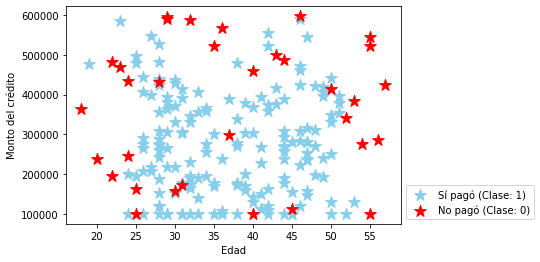

In [ ]:
plt.scatter(buenos["edad"], buenos["credito"],
            marker="*", s=150, color="skyblue",
            label="Sí pagó (Clase: 1)")

plt.scatter(malos["edad"], malos["credito"],
            marker="*", s=150, color="red",
            label="No pagó (Clase: 0)")

plt.ylabel("Monto del crédito")
plt.xlabel("Edad")
plt.legend(bbox_to_anchor=(1, 0.2))
plt.show()

# Preparación de los datos (Escalar)

In [ ]:
datos = clientes[["edad", "credito"]]
clase = clientes["cumplio"]

escalador = preprocessing.MinMaxScaler()

datos = escalador.fit_transform(datos)
datos

array([[0.        , 0.52964444],
       [0.02564103, 0.76084353],
       [0.05128205, 0.27995193],
       [0.1025641 , 0.19176844],
       [0.1025641 , 0.76931624],
       [0.12820513, 0.74242458],
       [0.12820513, 0.97341632],
       [0.15384615, 0.        ],
       [0.15384615, 0.19983453],
       [0.15384615, 0.29429053],
       [0.15384615, 0.67122276],
       [0.17948718, 0.        ],
       [0.17948718, 0.12374716],
       [0.17948718, 0.19192143],
       [0.17948718, 0.76130249],
       [0.17948718, 0.79673129],
       [0.20512821, 0.        ],
       [0.20512821, 0.21862589],
       [0.20512821, 0.33577846],
       [0.20512821, 0.35571521],
       [0.20512821, 0.38628463],
       [0.20512821, 0.61926119],
       [0.20512821, 0.69480706],
       [0.23076923, 0.21664509],
       [0.23076923, 0.23805134],
       [0.23076923, 0.60140789],
       [0.23076923, 0.90058196],
       [0.25641026, 0.        ],
       [0.25641026, 0.03816245],
       [0.25641026, 0.03904616],
       [0.

# Creación del Modelo KNN
## Valor de K

In [ ]:
clasificador = KNeighborsClassifier(n_neighbors=3)

clasificador.fit(datos, clase)

KNeighborsClassifier(n_neighbors=3)

# Nuevo Solicitante (Clasificación)

Clase: [0]
Probabilidades por clase [[0.66666667 0.33333333]]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  "X does not have valid feature names, but"


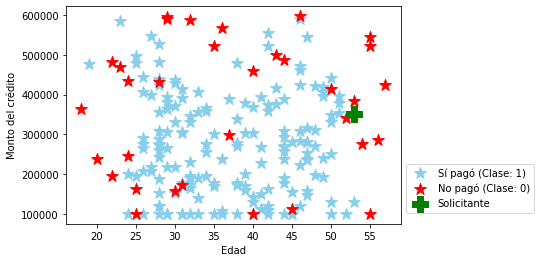

In [ ]:
edad = 53
monto = 350000

#Escalar los datos del nuevo solicitante
solicitante = escalador.transform([[edad, monto]])

#Calcular clase y probabilidades
print("Clase:", clasificador.predict(solicitante))
print("Probabilidades por clase",
      clasificador.predict_proba(solicitante))

#Código para graficar
plt.scatter(buenos["edad"], buenos["credito"],
            marker="*", s=150, color="skyblue", label="Sí pagó (Clase: 1)")
plt.scatter(malos["edad"], malos["credito"],
            marker="*", s=150, color="red", label="No pagó (Clase: 0)")
plt.scatter(edad, monto, marker="P", s=250, color="green", label="Solicitante")
plt.ylabel("Monto del crédito")
plt.xlabel("Edad")
plt.legend(bbox_to_anchor=(1, 0.3)) #Se usa para que la caja de los labels se encuentre fuera del grafico
plt.show()